# Script that creates a point grid based on your dataset and a site limit

## Readable for S-GeMS

The objective is to create an evenly spaced point grid based on your dataset and the site limit as a polygon !
An important recommendation is the format of the given arguments.

The script is based on X,Y,Z coordinates // lat-long coordinates should be transformed to X, Y, Z

Here goes the function:

In [3]:
def creat_point_file_regular_grid(data_points,site_limit,depth,stepsize_x,stepsize_y,stepsize_z,name):
    
    GRID=pd.DataFrame(columns=['X','Y','Z'])
    
    ## First we need to set the limits of the grid : it would be the max and min of the site limits
    xmax,xmin=site_limit.iloc[:,0].max(skipna=True),site_limit.iloc[:,0].min(skipna=True)
    ymax,ymin=site_limit.iloc[:,1].max(skipna=True),site_limit.iloc[:,1].min(skipna=True)
    zmax=data_points.iloc[:,2].max(skipna=True)
    zmin=zmax-depth
    
    print(xmin,ymin,zmax)
    
    ## Create the REGULAR GRID
    ## Iterate over the grid space
    
    x=xmin
    i=0
    while x < xmax:
        y=ymin
        while y< ymax:
            z=zmax
            while z>zmin:
                GRID.loc[i]=[x,y,z]
                i+=1
                z-=stepsize_z
            y+=stepsize_y
        x+=stepsize_x
        
    
    ## Check points inside polygon site using shapely
    points=[tuple(x) for x in site_limit.values]
    polygon=Polygon(points)
    in_site_class=[]
    subset=GRID[['X','Y']]
    grid_points_2D=[tuple(x) for x in subset.values]
    for point in grid_points_2D:
        if polygon.contains(Point(point))==True:
            in_site_class.append(1)
        if polygon.contains(Point(point))==False:
            in_site_class.append(0)
        
    GRID=pd.concat([GRID,pd.DataFrame(in_site_class)],axis=1)
    GRID.columns=['X','Y','Z','Site']
    
    GRID.to_csv(name, sep=',', encoding='utf-8')
    
    return GRID

Precision for the parameters:

1. data_points is a dataframe containing X, Y, Z coordinates in that order !
2. site_limit is a dataframe containing X, Y coordinates of the polygon edges clockwise !
3. depth is a number: gives how deep the grid will go from the "higher" point of your datapoints
4. stepsize for x, y and z are the lag value between nodes
5. name is the name of the saved file

The script is surely not very robust to NA values but should work fine.
In the final dataframe GRID - the site column indicates 0 if outside polygon and 1 if inside polygon (site). This is useful to define regions in S-GeMS
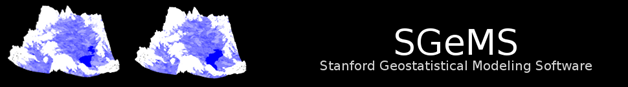

Hope it is useful !